# Sparkify Project Workspace
This workspace contains a tiny subset (128MB) of the full dataset available (12GB). Feel free to use this workspace to build your project, or to explore a smaller subset with Spark before deploying your cluster on the cloud. Instructions for setting up your Spark cluster is included in the last lesson of the Extracurricular Spark Course content.

You can follow the steps below to guide your data analysis and model building portion of this project.

In [2]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# create a Spark session


# Load and Clean Dataset
In this workspace, the mini-dataset file is `mini_sparkify_event_data.json`. Load and clean the dataset, checking for invalid or missing data - for example, records without userids or sessionids. 

In [4]:
df = pd.read_json('mini_sparkify_event_data.json', lines=True)
df.head()

,artist,auth,firstName,gender,itemInSession,lastName,length,level,location,method,page,registration,sessionId,song,status,ts,userAgent,userId
0,Martha Tilston,Logged In,Colin,M,50,Freeman,277.89016,paid,"Bakersfield, CA",PUT,NextSong,1.538173e+12,29,Rockpools,200,1538352117000,Mozilla/5.0 (Windows NT 6.1; WOW64; rv:31.0) G...,30
1,Five Iron Frenzy,Logged In,Micah,M,79,Long,236.09424,free,"Boston-Cambridge-Newton, MA-NH",PUT,NextSong,1.538332e+12,8,Canada,200,1538352180000,"""Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebK...",9
2,Adam Lambert,Logged In,Colin,M,51,Freeman,282.82730,paid,"Bakersfield, CA",PUT,NextSong,1.538173e+12,29,Time For Miracles,200,1538352394000,Mozilla/5.0 (Windows NT 6.1; WOW64; rv:31.0) G...,30
3,Enigma,Logged In,Micah,M,80,Long,262.71302,free,"Boston-Cambridge-Newton, MA-NH",PUT,NextSong,1.538332e+12,8,Knocking On Forbidden Doors,200,1538352416000,"""Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebK...",9
4,Daft Punk,Logged In,Colin,M,52,Freeman,223.60771,paid,"Bakersfield, CA",PUT,NextSong,1.538173e+12,29,Harder Better Faster Stronger,200,1538352676000,Mozilla/5.0 (Windows NT 6.1; WOW64; rv:31.0) G...,30


In [29]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 286500 entries, 0 to 286499
Data columns (total 19 columns):
artist           228108 non-null object
auth             286500 non-null object
firstName        278154 non-null object
gender           278154 non-null object
itemInSession    286500 non-null int64
lastName         278154 non-null object
length           228108 non-null float64
level            286500 non-null object
location         278154 non-null object
method           286500 non-null object
page             286500 non-null object
registration     278154 non-null float64
sessionId        286500 non-null int64
song             228108 non-null object
status           286500 non-null int64
ts               286500 non-null int64
userAgent        278154 non-null object
userId           286500 non-null object
Churn            286500 non-null int64
dtypes: float64(2), int64(5), object(12)
memory usage: 43.7+ MB


In [5]:
for col in df.columns:
    print(f'{col} = \n\t{df.iloc[0][col]}')

artist = 
	Martha Tilston
auth = 
	Logged In
firstName = 
	Colin
gender = 
	M
itemInSession = 
	50
lastName = 
	Freeman
length = 
	277.89016
level = 
	paid
location = 
	Bakersfield, CA
method = 
	PUT
page = 
	NextSong
registration = 
	1538173362000.0
sessionId = 
	29
song = 
	Rockpools
status = 
	200
ts = 
	1538352117000
userAgent = 
	Mozilla/5.0 (Windows NT 6.1; WOW64; rv:31.0) Gecko/20100101 Firefox/31.0
userId = 
	30


In [6]:
print(f'Shape of dataframe: {df.shape}')

Shape of dataframe: (286500, 18)


In [7]:
print(f'Null values per column: \n{df.isnull().sum()}')

Null values per column: 
artist           58392
auth                 0
firstName         8346
gender            8346
itemInSession        0
lastName          8346
length           58392
level                0
location          8346
method               0
page                 0
registration      8346
sessionId            0
song             58392
status               0
ts                   0
userAgent         8346
userId               0
dtype: int64


In [8]:
df.describe()

,itemInSession,length,registration,sessionId,status,ts
count,286500.000000,228108.000000,2.781540e+05,286500.000000,286500.000000,2.865000e+05
mean,114.414213,249.117182,1.535359e+12,1041.526555,210.054597,1.540957e+12
std,129.767262,99.235179,3.291322e+09,726.776263,31.505078,1.507544e+09
min,0.000000,0.783220,1.521381e+12,1.000000,200.000000,1.538352e+12
25%,27.000000,199.888530,1.533522e+12,336.000000,200.000000,1.539697e+12
50%,70.000000,234.500770,1.536664e+12,1013.000000,200.000000,1.540932e+12
75%,156.250000,277.158730,1.537672e+12,1675.000000,200.000000,1.542266e+12
max,1321.000000,3024.665670,1.543247e+12,2474.000000,404.000000,1.543799e+12


In [9]:
df.dropna(how='any', subset=['userId'], axis=0, inplace=True) 

In [10]:
# df = df.dropna(how='any', axis=0) 
print(f"Unique users = {len(df['userId'].unique())}")          

Unique users = 226


# Exploratory Data Analysis
When you're working with the full dataset, perform EDA by loading a small subset of the data and doing basic manipulations within Spark. In this workspace, you are already provided a small subset of data you can explore.

### Define Churn

Once you've done some preliminary analysis, create a column `Churn` to use as the label for your model. I suggest using the `Cancellation Confirmation` events to define your churn, which happen for both paid and free users. As a bonus task, you can also look into the `Downgrade` events.

### Explore Data
Once you've defined churn, perform some exploratory data analysis to observe the behavior for users who stayed vs users who churned. You can start by exploring aggregates on these two groups of users, observing how much of a specific action they experienced per a certain time unit or number of songs played.

In [11]:
df.head()

,artist,auth,firstName,gender,itemInSession,lastName,length,level,location,method,page,registration,sessionId,song,status,ts,userAgent,userId
0,Martha Tilston,Logged In,Colin,M,50,Freeman,277.89016,paid,"Bakersfield, CA",PUT,NextSong,1.538173e+12,29,Rockpools,200,1538352117000,Mozilla/5.0 (Windows NT 6.1; WOW64; rv:31.0) G...,30
1,Five Iron Frenzy,Logged In,Micah,M,79,Long,236.09424,free,"Boston-Cambridge-Newton, MA-NH",PUT,NextSong,1.538332e+12,8,Canada,200,1538352180000,"""Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebK...",9
2,Adam Lambert,Logged In,Colin,M,51,Freeman,282.82730,paid,"Bakersfield, CA",PUT,NextSong,1.538173e+12,29,Time For Miracles,200,1538352394000,Mozilla/5.0 (Windows NT 6.1; WOW64; rv:31.0) G...,30
3,Enigma,Logged In,Micah,M,80,Long,262.71302,free,"Boston-Cambridge-Newton, MA-NH",PUT,NextSong,1.538332e+12,8,Knocking On Forbidden Doors,200,1538352416000,"""Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebK...",9
4,Daft Punk,Logged In,Colin,M,52,Freeman,223.60771,paid,"Bakersfield, CA",PUT,NextSong,1.538173e+12,29,Harder Better Faster Stronger,200,1538352676000,Mozilla/5.0 (Windows NT 6.1; WOW64; rv:31.0) G...,30


In [12]:
df['page'].value_counts()

NextSong                     228108
Home                          14457
Thumbs Up                     12551
Add to Playlist                6526
Add Friend                     4277
Roll Advert                    3933
Login                          3241
Logout                         3226
Thumbs Down                    2546
Downgrade                      2055
Help                           1726
Settings                       1514
About                           924
Upgrade                         499
Save Settings                   310
Error                           258
Submit Upgrade                  159
Submit Downgrade                 63
Cancel                           52
Cancellation Confirmation        52
Register                         18
Submit Registration               5
Name: page, dtype: int64

In [13]:
len(df['artist'].unique())

17656

In [14]:
df['page'].unique()

array(['NextSong', 'Add to Playlist', 'Roll Advert', 'Thumbs Up',
       'Downgrade', 'Thumbs Down', 'Home', 'Logout', 'Help', 'Login',
       'Upgrade', 'Add Friend', 'About', 'Settings', 'Submit Upgrade',
       'Submit Downgrade', 'Error', 'Save Settings', 'Cancel',
       'Cancellation Confirmation', 'Register', 'Submit Registration'], dtype=object)

In [15]:
df[df['page'] == 'Cancellation Confirmation']

,artist,auth,firstName,gender,itemInSession,lastName,length,level,location,method,page,registration,sessionId,song,status,ts,userAgent,userId
20231,NaN,Cancelled,Adriel,M,104,Mendoza,NaN,paid,"Kansas City, MO-KS",GET,Cancellation Confirmation,1.535623e+12,514,NaN,200,1538943990000,"""Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4...",18
23811,NaN,Cancelled,Diego,M,56,Mckee,NaN,paid,"Phoenix-Mesa-Scottsdale, AZ",GET,Cancellation Confirmation,1.537168e+12,540,NaN,200,1539033046000,"""Mozilla/5.0 (iPhone; CPU iPhone OS 7_1_2 like...",32
37817,NaN,Cancelled,Mason,M,10,Hart,NaN,free,"Corpus Christi, TX",GET,Cancellation Confirmation,1.533157e+12,174,NaN,200,1539318918000,"""Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4...",125
40356,NaN,Cancelled,Alexander,M,332,Garcia,NaN,paid,"Indianapolis-Carmel-Anderson, IN",GET,Cancellation Confirmation,1.536817e+12,508,NaN,200,1539375441000,Mozilla/5.0 (Windows NT 6.1; WOW64; rv:31.0) G...,105
42009,NaN,Cancelled,Kayla,F,273,Johnson,NaN,paid,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD",GET,Cancellation Confirmation,1.538334e+12,797,NaN,200,1539465584000,Mozilla/5.0 (Windows NT 6.1; WOW64; rv:24.0) G...,17
44616,NaN,Cancelled,Molly,F,29,Harrison,NaN,free,"Virginia Beach-Norfolk-Newport News, VA-NC",GET,Cancellation Confirmation,1.534255e+12,843,NaN,200,1539588854000,"""Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_4...",143
52748,NaN,Cancelled,Alex,M,145,Hogan,NaN,paid,"Denver-Aurora-Lakewood, CO",GET,Cancellation Confirmation,1.535066e+12,842,NaN,200,1539729037000,Mozilla/5.0 (Windows NT 6.2; WOW64; rv:31.0) G...,101
53205,NaN,Cancelled,Davis,M,34,Wang,NaN,paid,"Flint, MI",GET,Cancellation Confirmation,1.538290e+12,802,NaN,200,1539736161000,"""Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebK...",129
54476,NaN,Cancelled,Nikolas,M,287,Olsen,NaN,paid,"Oxnard-Thousand Oaks-Ventura, CA",GET,Cancellation Confirmation,1.528404e+12,881,NaN,200,1539759749000,Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:31....,121
54619,NaN,Cancelled,Ethan,M,176,Johnson,NaN,paid,"Lexington-Fayette, KY",GET,Cancellation Confirmation,1.538081e+12,934,NaN,200,1539761972000,"""Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebK...",51


In [16]:
# df["Churn"] = df[df["page"] == 'Cancellation Confirmation', 1]
# df.loc[df['page'] == 'Cancellation Confirmation', 'Churn'] = 1
df['Churn'] = df['page'].apply(lambda x: 1 if x == 'Cancellation Confirmation' else 0)

In [17]:
categories = list(df.select_dtypes(include=['object']))
print("Categorical data: ", categories)

Categorical data:  ['artist', 'auth', 'firstName', 'gender', 'lastName', 'level', 'location', 'method', 'page', 'song', 'userAgent', 'userId']


In [18]:
'''
perform some exploratory data analysis to observe the behavior for users who stayed vs users who churned. 
You can start by exploring aggregates on these two groups of users, observing how much of a specific 
action they experienced per a certain time unit or number of songs played.
'''

'\nperform some exploratory data analysis to observe the behavior for users who stayed vs users who churned. \nYou can start by exploring aggregates on these two groups of users, observing how much of a specific \naction they experienced per a certain time unit or number of songs played.\n'

In [19]:
df[df['Churn'] == 1]['artist'].value_counts().sum()

0

In [20]:
unique_userIds = df['userId'].sort_values().unique()
unique_userIds

array(['', '10', '100', '100001', '100002', '100003', '100004', '100005',
       '100006', '100007', '100008', '100009', '100010', '100011',
       '100012', '100013', '100014', '100015', '100016', '100017',
       '100018', '100019', '100021', '100022', '100023', '100024',
       '100025', '101', '102', '103', '104', '105', '106', '107', '108',
       '109', '11', '110', '111', '112', '113', '114', '115', '116', '117',
       '118', '119', '12', '120', '121', '122', '123', '124', '125', '126',
       '127', '128', '129', '13', '131', '132', '133', '134', '135', '136',
       '137', '138', '139', '14', '140', '141', '142', '143', '144', '145',
       '146', '147', '148', '149', '15', '150', '151', '152', '153', '154',
       '155', '156', '16', '17', '18', '19', '2', '20', '200001', '200002',
       '200003', '200004', '200005', '200006', '200007', '200008',
       '200009', '200010', '200011', '200012', '200014', '200015',
       '200016', '200017', '200018', '200019', '200020', '2000

In [21]:
churned_UID_array = np.zeros(len(unique_userIds))
churned_UIDs = []

for i in range(len(unique_userIds)):
#     print(UID)
    UID = unique_userIds[i]
    # Check if UID has churned
    churn_sum = df[df['userId'] == UID]['Churn'].sum()#.value_counts()#.sum()
#     print(churn_sum)
    if churn_sum > 0:
#         print(f'{UID} = 1')
        churned_UID_array[i] = 1
        churned_UIDs.append(UID)
    else:
#         print(f'{UID} = 0')
        churned_UID_array[i] = 0

churned_UIDs_array = np.array([churned_UIDs])

new_array = np.column_stack((unique_userIds, churned_UID_array))
df_UID_churned = pd.DataFrame(new_array, columns=['userIDs', 'Churned'])
df_UID_churned.head()

,userIDs,Churned
0,,0
1,10,0
2,100,0
3,100001,1
4,100002,0


In [22]:
churned_UIDs_array

array([['100001', '100003', '100005', '100006', '100007', '100009',
        '100011', '100012', '100013', '100014', '100015', '100017',
        '100019', '100021', '100022', '100023', '100024', '100025', '101',
        '103', '105', '106', '12', '121', '122', '125', '129', '143', '17',
        '18', '200001', '200011', '200015', '200016', '200017', '200018',
        '200020', '200021', '200024', '28', '29', '3', '300001', '300007',
        '32', '51', '53', '54', '58', '70', '73', '87']], 
      dtype='<U6')

In [23]:
df.head()

,artist,auth,firstName,gender,itemInSession,lastName,length,level,location,method,page,registration,sessionId,song,status,ts,userAgent,userId,Churn
0,Martha Tilston,Logged In,Colin,M,50,Freeman,277.89016,paid,"Bakersfield, CA",PUT,NextSong,1.538173e+12,29,Rockpools,200,1538352117000,Mozilla/5.0 (Windows NT 6.1; WOW64; rv:31.0) G...,30,0
1,Five Iron Frenzy,Logged In,Micah,M,79,Long,236.09424,free,"Boston-Cambridge-Newton, MA-NH",PUT,NextSong,1.538332e+12,8,Canada,200,1538352180000,"""Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebK...",9,0
2,Adam Lambert,Logged In,Colin,M,51,Freeman,282.82730,paid,"Bakersfield, CA",PUT,NextSong,1.538173e+12,29,Time For Miracles,200,1538352394000,Mozilla/5.0 (Windows NT 6.1; WOW64; rv:31.0) G...,30,0
3,Enigma,Logged In,Micah,M,80,Long,262.71302,free,"Boston-Cambridge-Newton, MA-NH",PUT,NextSong,1.538332e+12,8,Knocking On Forbidden Doors,200,1538352416000,"""Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebK...",9,0
4,Daft Punk,Logged In,Colin,M,52,Freeman,223.60771,paid,"Bakersfield, CA",PUT,NextSong,1.538173e+12,29,Harder Better Faster Stronger,200,1538352676000,Mozilla/5.0 (Windows NT 6.1; WOW64; rv:31.0) G...,30,0


In [30]:
windowval = Window.partitionBy("userId").orderBy(desc("ts")).rangeBetween(Window.unboundedPreceding, 0)
windowval

NameError: name 'Window' is not defined

In [25]:
df.groupby(['Churn', 'userId'])['artist'].value_counts() # ['song']

Churn  userId  artist                                                                
0      10      Coldplay                                                                  9
               Eminem                                                                    6
               BjÃÂ¶rk                                                                  5
               Taylor Swift                                                              5
               Barry Tuckwell/Academy of St Martin-in-the-Fields/Sir Neville Marriner    4
               Bill Withers                                                              4
               Dwight Yoakam                                                             4
               Muse                                                                      4
               Rihanna                                                                   4
               Alejandro Sanz                                                            3
    

In [99]:
print(df['ts'].min() - df['ts'].min())
print((df['ts'].max() - df['ts'].min()) / (df['ts'].max() - df['ts'].min()))

0
1.0


In [101]:
print(df['length'].min())
print(df['length'].max())

0.78322
3024.66567


(array([  1.89484000e+05,   3.65360000e+04,   1.71600000e+03,
          1.86000000e+02,   9.30000000e+01,   3.90000000e+01,
          1.20000000e+01,   9.00000000e+00,   2.20000000e+01,
          1.10000000e+01]),
 array([  7.83220000e-01,   3.03171465e+02,   6.05559710e+02,
          9.07947955e+02,   1.21033620e+03,   1.51272445e+03,
          1.81511269e+03,   2.11750093e+03,   2.41988918e+03,
          2.72227742e+03,   3.02466567e+03]),
 <a list of 10 Patch objects>)

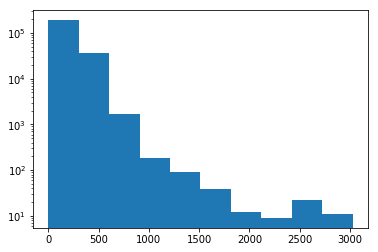

In [105]:
plt.hist(df[~np.isnan(df['length'])]['length'], log=True)

In [68]:
len(df_UID_churned)

226

In [77]:
vals = df_UID_churned['Churned'].value_counts()

<Container object of 2 artists>

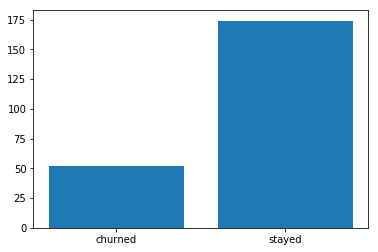

In [80]:
plt.bar(['stayed', 'churned'], height = [vals[0], vals[1]])

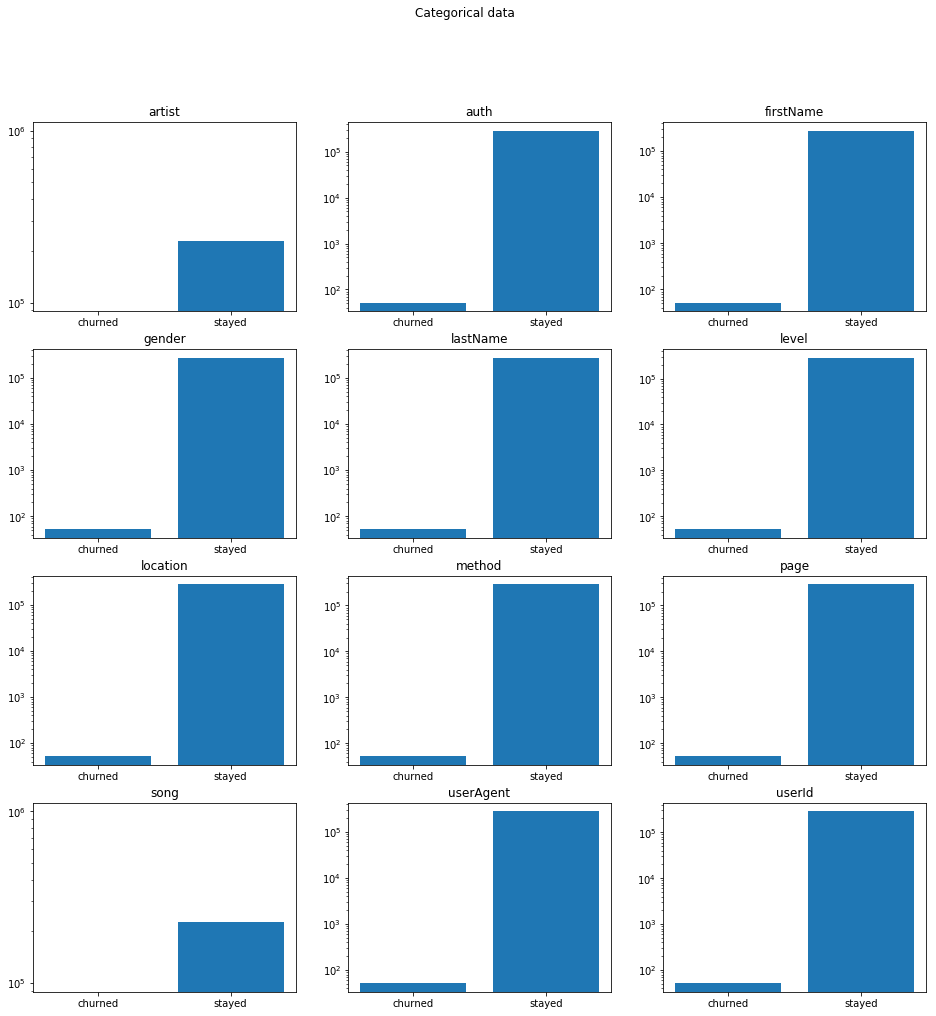

In [40]:
# sns.countplot(x='artist', hue="Churn", data=df)
fig, axes = plt.subplots(int(np.ceil(len(categories) / 3)), 3, figsize=(16, 16))
fig.suptitle('Categorical data')

i_idx = 0
j_idx = 0

for cat in categories: 
       
    churned = df[df['Churn'] == 1][cat].value_counts().sum()
    stayed = df[df['Churn'] == 0][cat].value_counts().sum()
    axes[i_idx, j_idx].bar(x = np.array(['churned', 'stayed']), height=np.array([churned, stayed]), log=True)
    axes[i_idx, j_idx].set_title(cat)
    
    j_idx += 1
    if j_idx > 2:
        j_idx = 0
        i_idx += 1

In [15]:
def categorical_analysis_plots(df, categories):
    fig, axes = plt.subplots(int(np.ceil(len(categories) / 3)), 3, figsize=(16, 16))
    fig.suptitle('Categorical data')
    i_idx = 0
    j_idx = 0
    
    for cat in categories:
        sns.countplot(ax = axes[i_idx, j_idx], x=cat, hue="Churn", data=df).set(title=f'{cat}')
        if len(df[cat].unique()) > 3:
            axes[i_idx, j_idx].set_xticklabels(axes[i_idx, j_idx].get_xticklabels(), rotation=40, ha="right")

        j_idx += 1
        if j_idx > 2:
            j_idx = 0
            i_idx += 1
    plt.tight_layout()

In [16]:
categories = list(df.select_dtypes(include=['object']))
print("Categorical data: ", categories)

Categorical data:  ['artist', 'auth', 'firstName', 'gender', 'lastName', 'level', 'location', 'method', 'page', 'song', 'userAgent', 'userId']


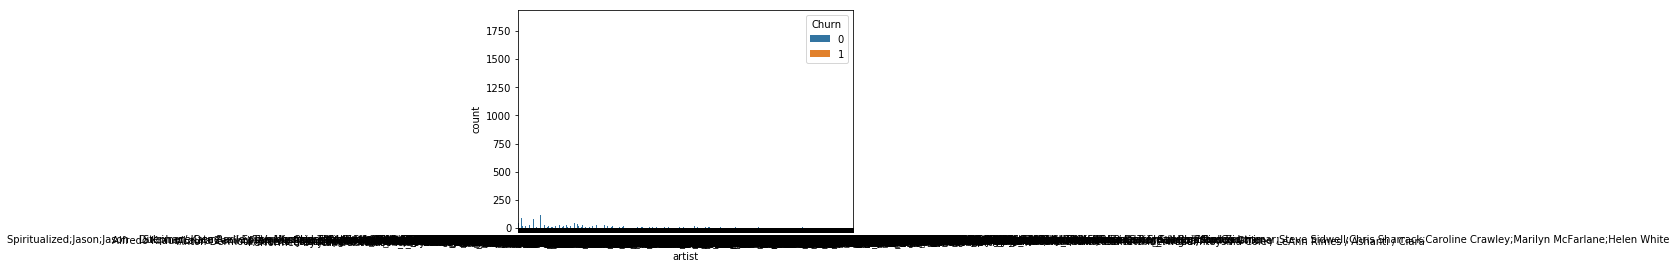

In [18]:
sns.countplot(data=df, x='artist', hue="Churn")

In [ ]:

for cat in categories: 
    sns.countplot(data=df, x=artist, hue="Churn")

In [ ]:
fig, axes = plt.subplots(int(np.ceil(len(categories) / 3)), 3, figsize=(16, 16))
fig.suptitle('Categorical data')
i_idx = 0
j_idx = 0
for cat in categories:
    sns.countplot(ax = axes[i_idx, j_idx], x=cat, hue="Churn", data=df).set(title=f'{cat}')
    j_idx += 1
    if j_idx > 2:
        j_idx = 0
        i_idx += 1
plt.tight_layout()

In [ ]:
categorical_analysis_plots(df, categories)


# Feature Engineering
Once you've familiarized yourself with the data, build out the features you find promising to train your model on. To work with the full dataset, you can follow the following steps.
- Write a script to extract the necessary features from the smaller subset of data
- Ensure that your script is scalable, using the best practices discussed in Lesson 3
- Try your script on the full data set, debugging your script if necessary

If you are working in the classroom workspace, you can just extract features based on the small subset of data contained here. Be sure to transfer over this work to the larger dataset when you work on your Spark cluster.

# Modeling
Split the full dataset into train, test, and validation sets. Test out several of the machine learning methods you learned. Evaluate the accuracy of the various models, tuning parameters as necessary. Determine your winning model based on test accuracy and report results on the validation set. Since the churned users are a fairly small subset, I suggest using F1 score as the metric to optimize.

# Final Steps
Clean up your code, adding comments and renaming variables to make the code easier to read and maintain. Refer to the Spark Project Overview page and Data Scientist Capstone Project Rubric to make sure you are including all components of the capstone project and meet all expectations. Remember, this includes thorough documentation in a README file in a Github repository, as well as a web app or blog post.